# Overview
If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

## Goal:
Your goal is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

## Part One: Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

# ----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv(r"fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


In [5]:
fandango.sample(5)

,FILM,STARS,RATING,VOTES
436,7 Minutes (2015),0.0,0.0,0
464,La passion d'Augustine (2015),0.0,0.0,0
99,American Ultra (2015),4.0,3.7,638
117,What We Do in the Shadows (2015),4.5,4.3,259
486,Set Fire to the Stars (2015),0.0,0.0,0


In [6]:
fandango.shape

(504, 4)

In [7]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Let's explore the relationship between popularity of a film and its rating.

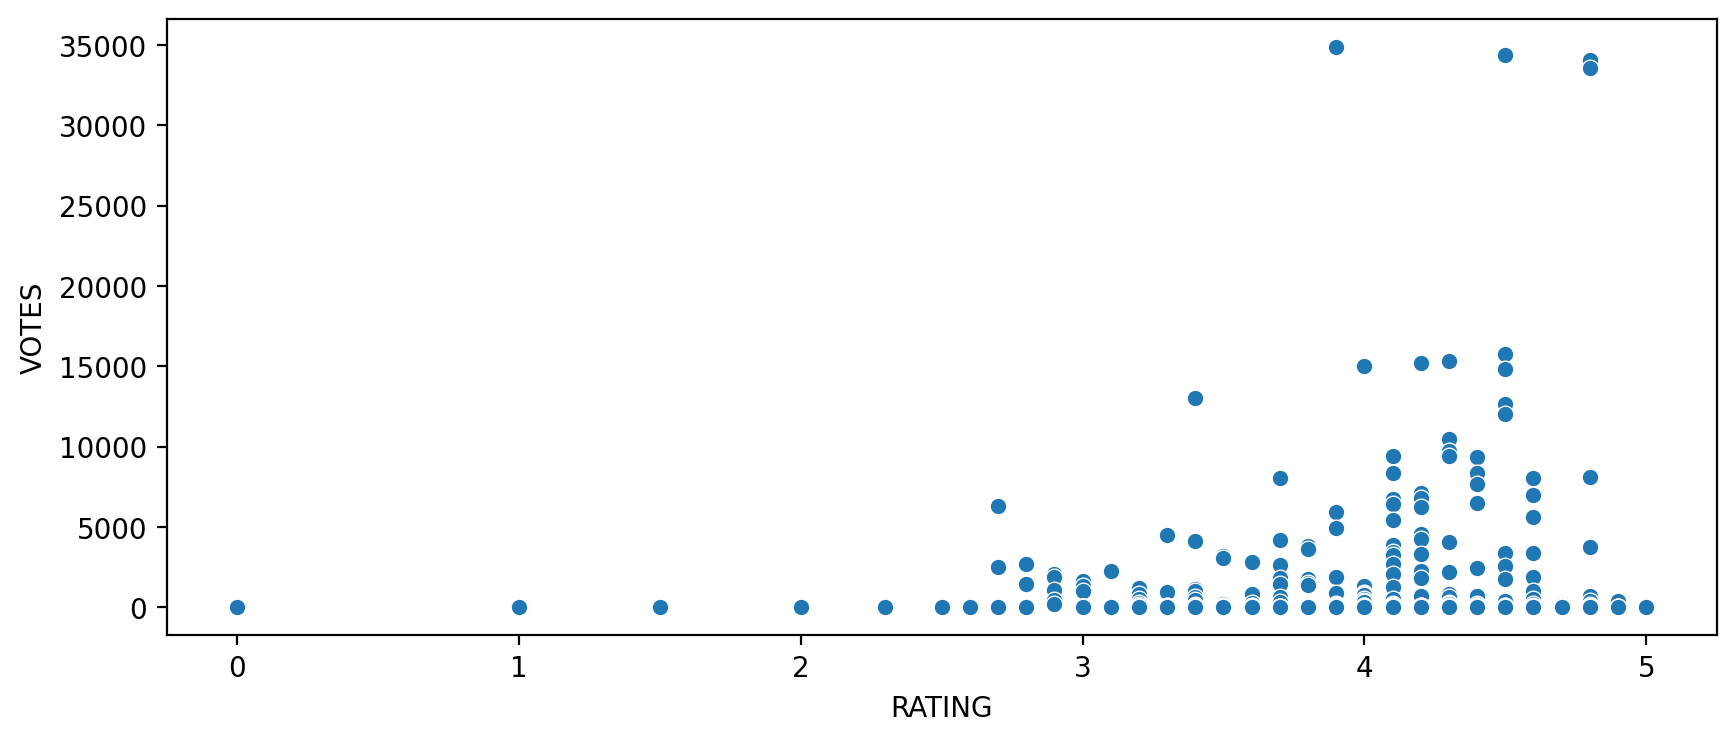

In [9]:
plt.figure(figsize=(10,4),dpi=200)

sns.scatterplot(data=fandango,x='RATING',y='VOTES');

### Calculating the correlation between the columns

In [10]:
fandango.corr()

C:\Users\vijay\AppData\Local\Temp\ipykernel_13280\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Creating a new column that is able to strip the year from the title strings and set this new column as YEAR

In [11]:
year = 'Film Title Name (Year)'

In [12]:
year.split('(')[-1].replace(')','')

'Year'

In [13]:
fandango['YEAR'] = fandango['FILM'].apply(lambda year:year.split('(')[-1].replace(')',''))

In [14]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [15]:
fandango.value_counts('YEAR')

YEAR
2015    478
2014     23
1964      1
2012      1
2016      1
dtype: int64

### Visualizing the count of movies per year with a plot

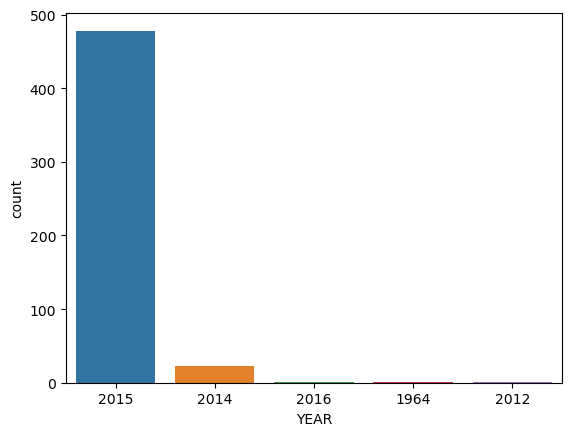

In [16]:
sns.countplot(data=fandango,x='YEAR');

### Top 10 movies with the highest number of votes

In [17]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### How many movies have zero votes

In [18]:
len(fandango[fandango['VOTES'] == 0])

69

### Creating DataFrame of only reviewed films by removing any films that have zero votes.

In [19]:
fandango1 = fandango[fandango['VOTES'] > 0]

In [20]:
fandango1

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


### Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)

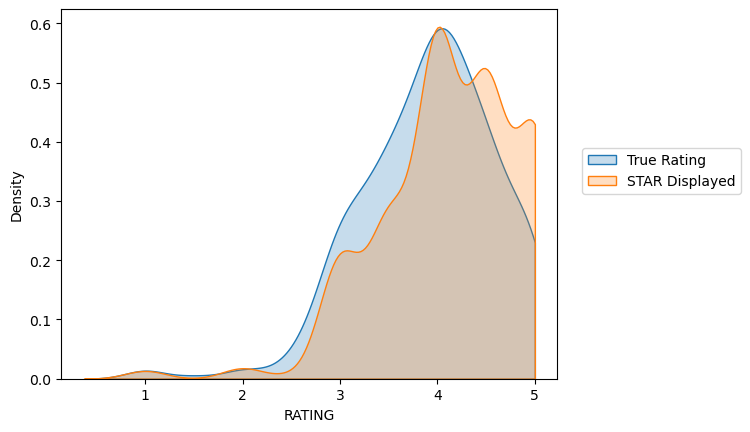

In [21]:
sns.kdeplot(data=fandango1,x='RATING',clip=[0,5],fill=True,label='True Rating');
sns.kdeplot(data=fandango1,x='STARS',clip=[0,5],fill=True,label='STAR Displayed');
plt.legend(loc=(1.05,0.5))

### Creating a new column of the difference between STARS displayed versus true RATING.

In [22]:
fandango1['STARS_DIFF'] = fandango1['STARS'] - fandango1['RATING']

C:\Users\vijay\AppData\Local\Temp\ipykernel_13280\1283554698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango1['STARS_DIFF'] = fandango1['STARS'] - fandango1['RATING']


In [23]:
fandango1['STARS_DIFF'] = fandango1['STARS_DIFF'].round(2)

C:\Users\vijay\AppData\Local\Temp\ipykernel_13280\2622306232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango1['STARS_DIFF'] = fandango1['STARS_DIFF'].round(2)


In [24]:
fandango1.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


### Creating a count plot to display the number of times a certain difference occurs

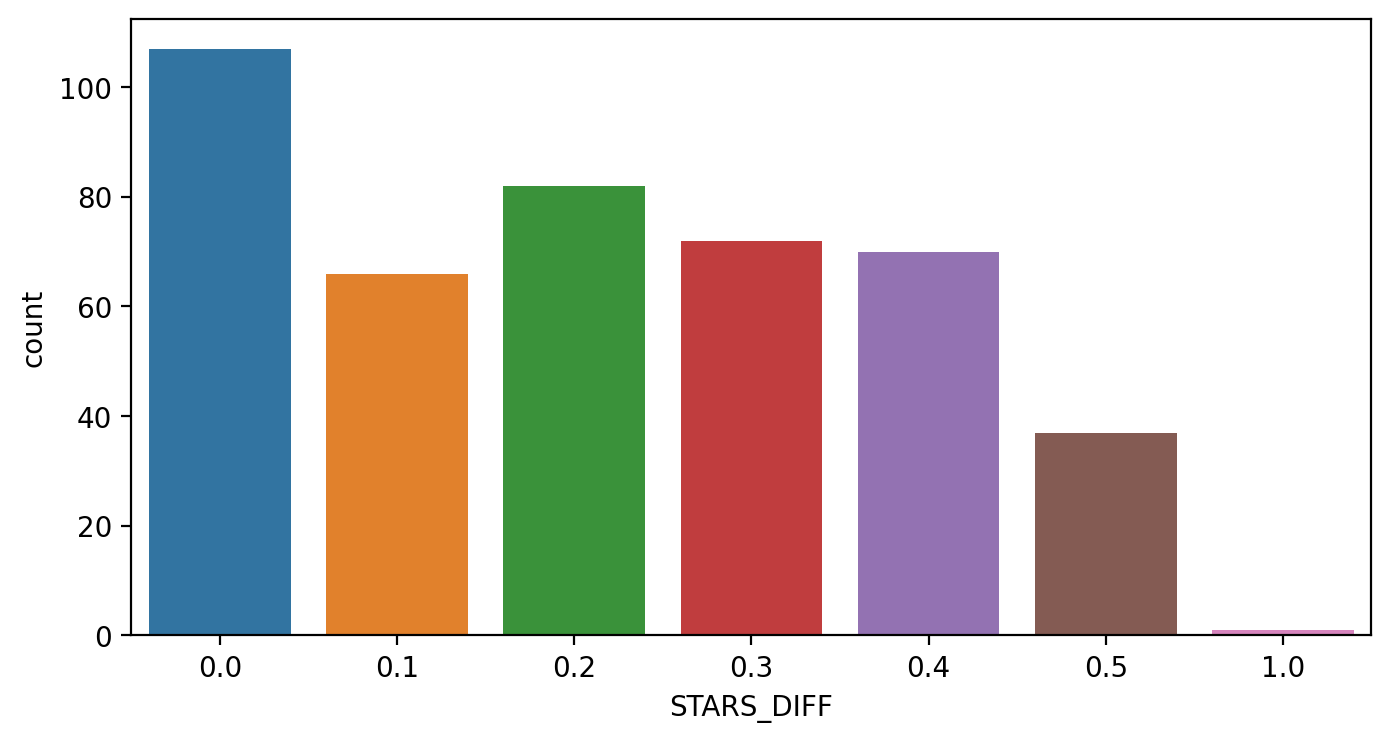

In [25]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=fandango1, x='STARS_DIFF');

### We can see from the plot that one movie was displaying over a 1 star difference than its true rating!

In [26]:
fandango1[fandango1['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [27]:
all_sites = pd.read_csv(r"all_sites_scores.csv")

In [28]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [29]:
all_sites.tail()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289


In [30]:
all_sites.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
34,Aloha (2015),19,31,40,4.0,5.5,67,12255
32,The Hunting Ground (2015),92,72,77,7.8,7.5,6,1196
27,Still Alice (2015),88,85,72,7.8,7.5,153,57123
38,Saint Laurent (2015),51,45,52,6.8,6.3,8,2196
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227


In [31]:
all_sites.shape

(146, 8)

In [32]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [33]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [34]:
all_sites.isna().sum()

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
dtype: int64

# Rotten Tomatoes

### Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

(0.0, 100.0)

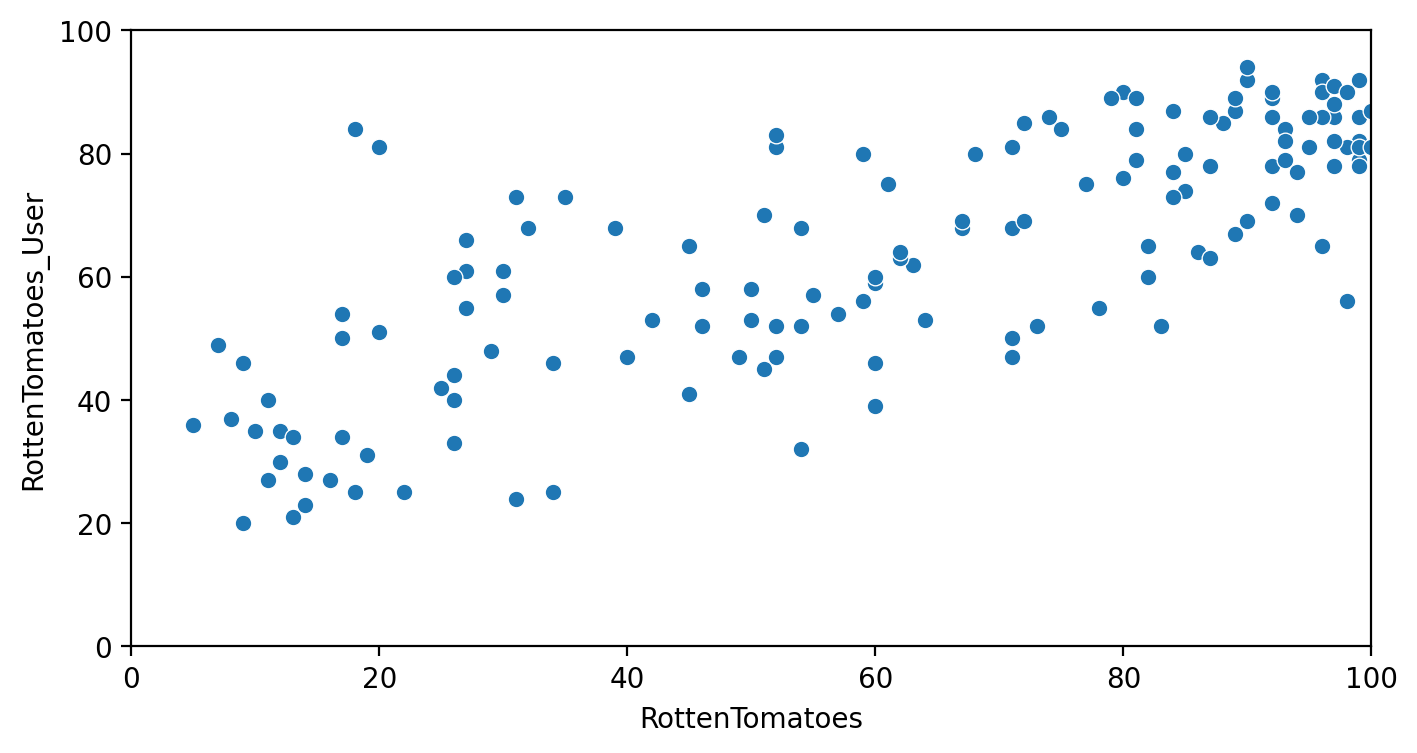

In [35]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

### Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.

In [36]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [37]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


### Let's now compare the overall mean difference

In [38]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

### Plot the distribution of the differences between RT Critics Score and RT User Score.

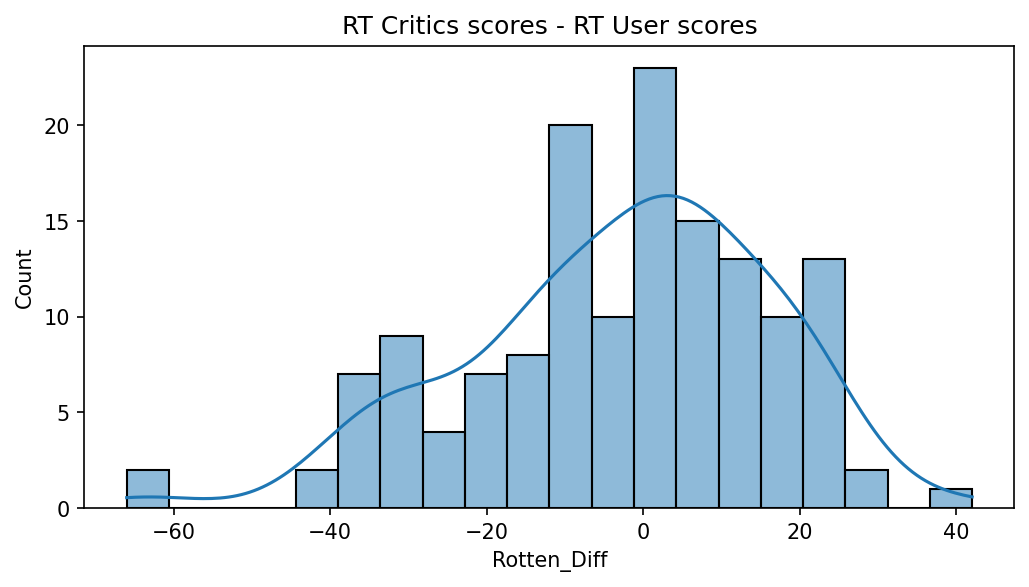

In [39]:
plt.figure(figsize=(8,4),dpi=150)

sns.histplot(data=all_sites, x='Rotten_Diff',bins=20, kde=True)
plt.title('RT Critics scores - RT User scores');

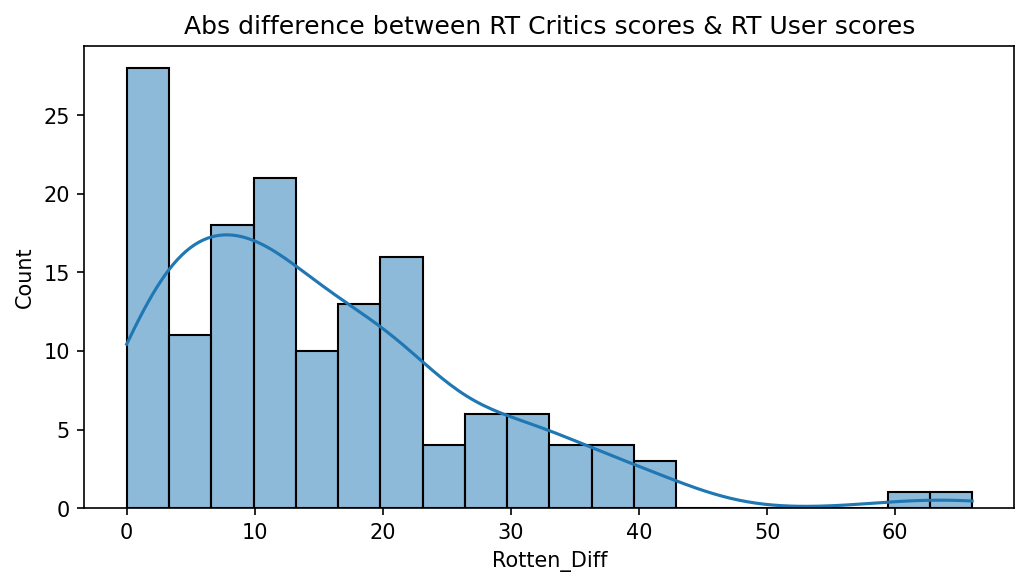

In [40]:
plt.figure(figsize=(8,4),dpi=150)

sns.histplot(data=all_sites, x=all_sites['Rotten_Diff'].apply(abs),bins=20, kde=True)
plt.title('Abs difference between RT Critics scores & RT User scores');

### Let's find out which movies are causing the largest differences.

### Top 5 movies users rated higher than critics on average

In [41]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

### Top 5 movies critics scores higher than users on average.

In [42]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

# MetaCritic

### Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

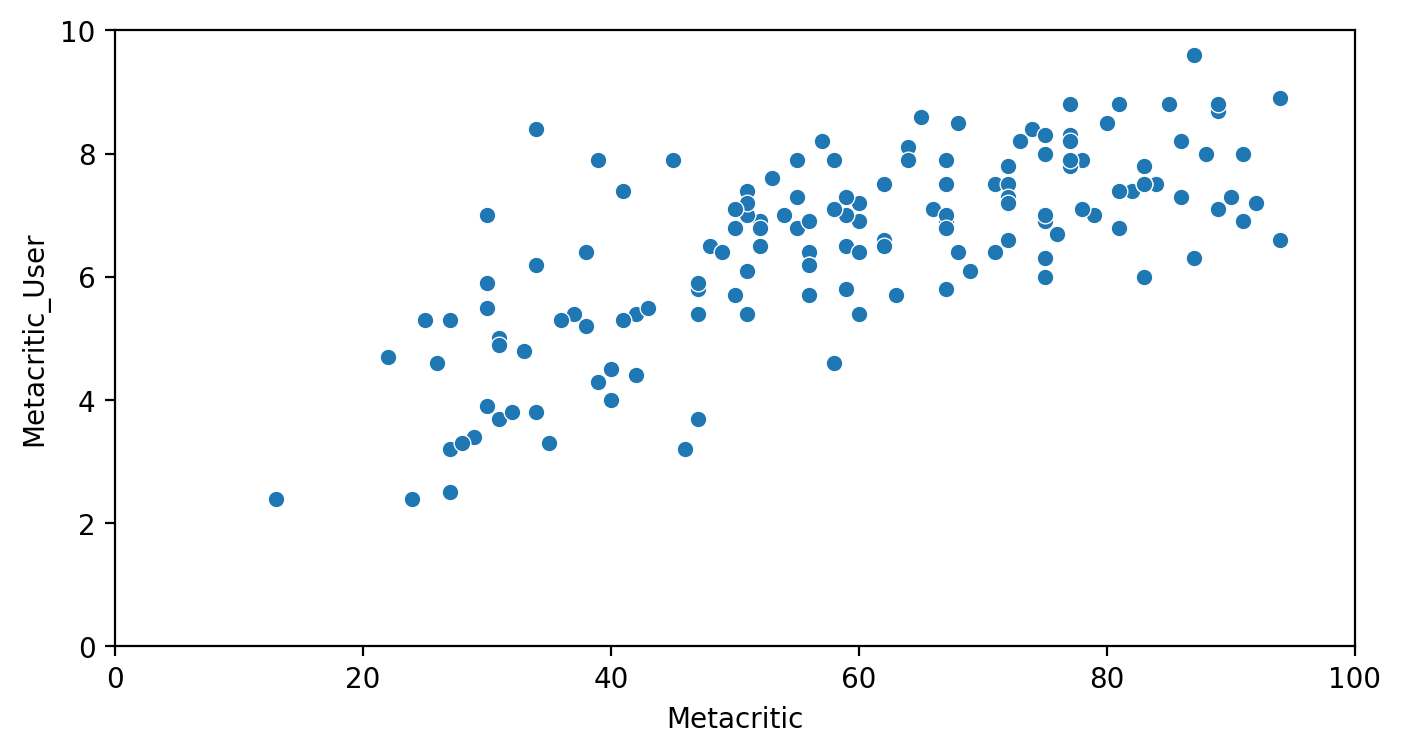

In [43]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

# IMDB

### Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

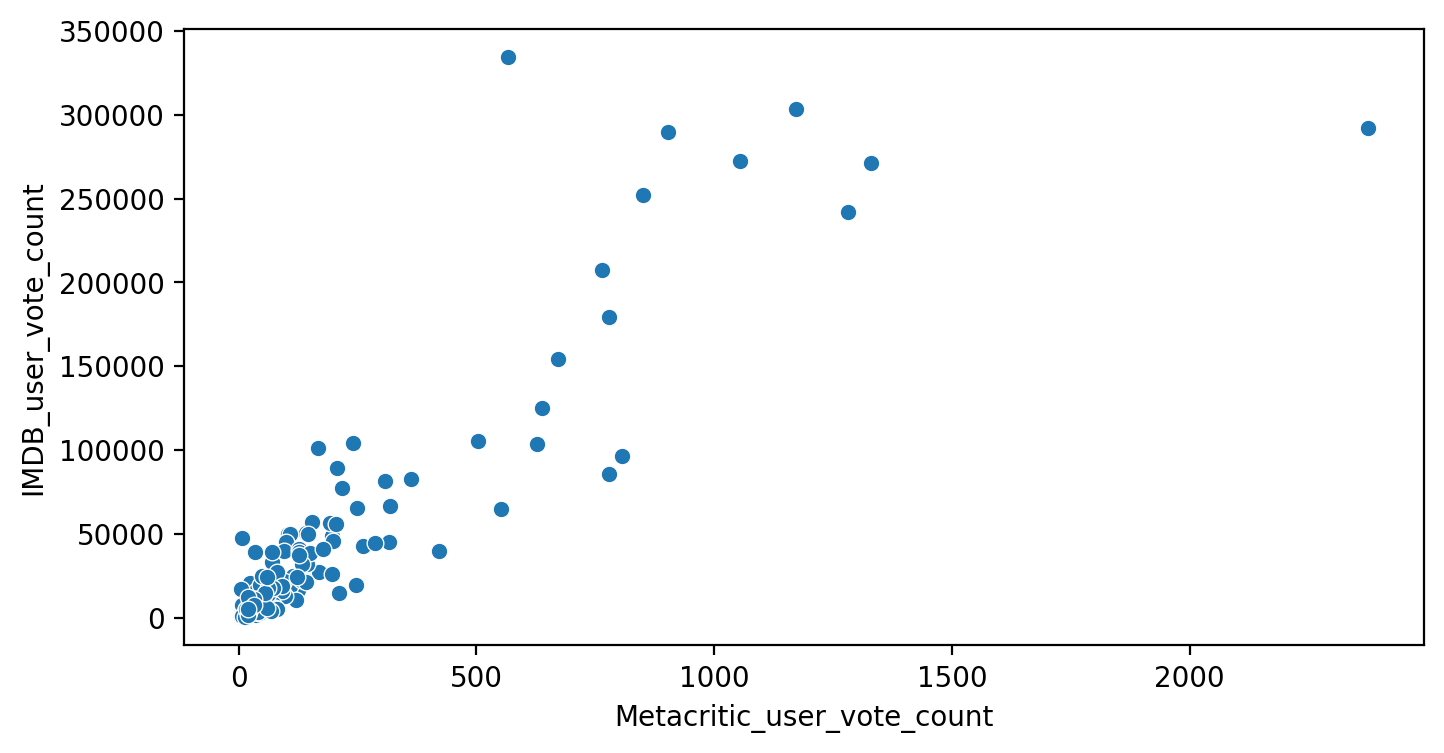

In [44]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites, y='IMDB_user_vote_count', x='Metacritic_user_vote_count');

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

### Let's find the movie which has the highest IMDB user vote count.

In [45]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### Let's find the movie which has the highest Metacritic user vote count.

In [46]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandago Scores vs. All Sites

### Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

# Combining the Fandango Table with the All Sites table.

In [47]:
df = pd.merge(fandango, all_sites, how='inner', on='FILM')

Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames

In [48]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [49]:
df.shape

(145, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
VOTES,145.0,3817.696552,6368.668671,35.0,218.0,1430.0,4279.0,34846.0
RottenTomatoes,145.0,60.634483,30.161098,5.0,31.0,63.0,89.0,100.0
RottenTomatoes_User,145.0,63.696552,19.974749,20.0,50.0,66.0,81.0,94.0
Metacritic,145.0,58.696552,19.538183,13.0,43.0,59.0,75.0,94.0
Metacritic_User,145.0,6.508966,1.510883,2.4,5.7,6.8,7.5,9.6
IMDB,145.0,6.729655,0.957944,4.0,6.3,6.9,7.4,8.6
Metacritic_user_vote_count,145.0,184.489655,317.361740,4.0,33.0,72.0,167.0,2375.0
IMDB_user_vote_count,145.0,42572.186207,67558.506121,243.0,5626.0,18986.0,44711.0,334164.0


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [52]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20,1)
df['RT_User_Norm'] = np.round(df['RottenTomatoes_User'] / 20,1)

In [53]:
df['Meta_Norm'] = np.round(df['Metacritic'] / 20,1)
df['Meta_User_Norm'] = np.round(df['Metacritic_User'] / 2,1)

In [54]:
df['IMDB_Norm'] = np.round(df['IMDB'] / 2,1)

In [55]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### Creating a new DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [56]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RT_User_Norm', 'Meta_Norm', 'Meta_User_Norm', 'IMDB_Norm'],
      dtype='object')

In [57]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RT_User_Norm', 'Meta_Norm', 'Meta_User_Norm', 'IMDB_Norm']]

In [58]:
norm_scores.head()

,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


# Comparing Distribution of Scores Across Sites

### Comparing the distributions of normalized ratings across all sites.

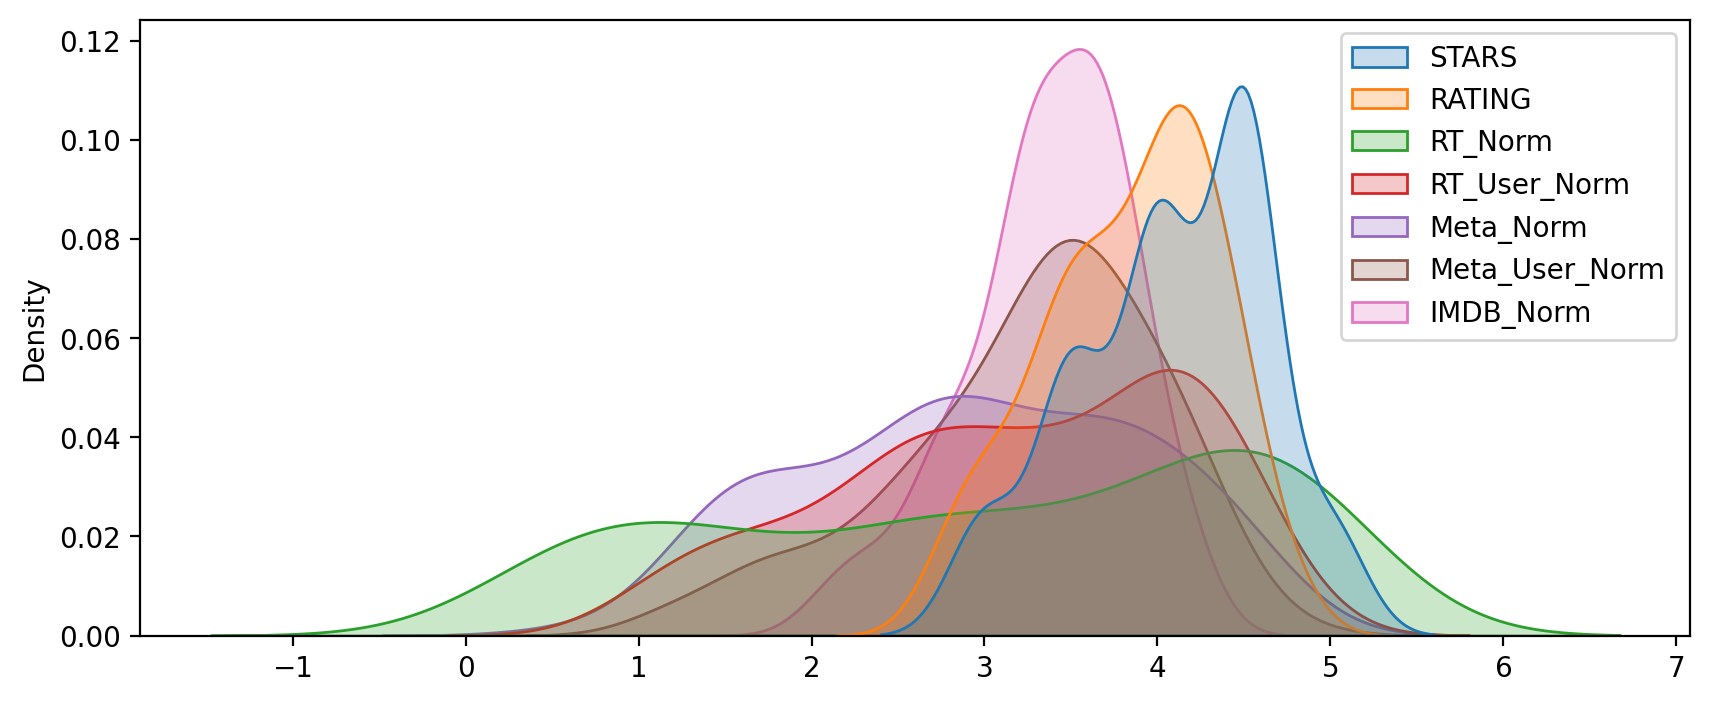

In [59]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores,fill=True);

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

### Comparing the distribution of RT critic ratings against the STARS displayed by Fandango.

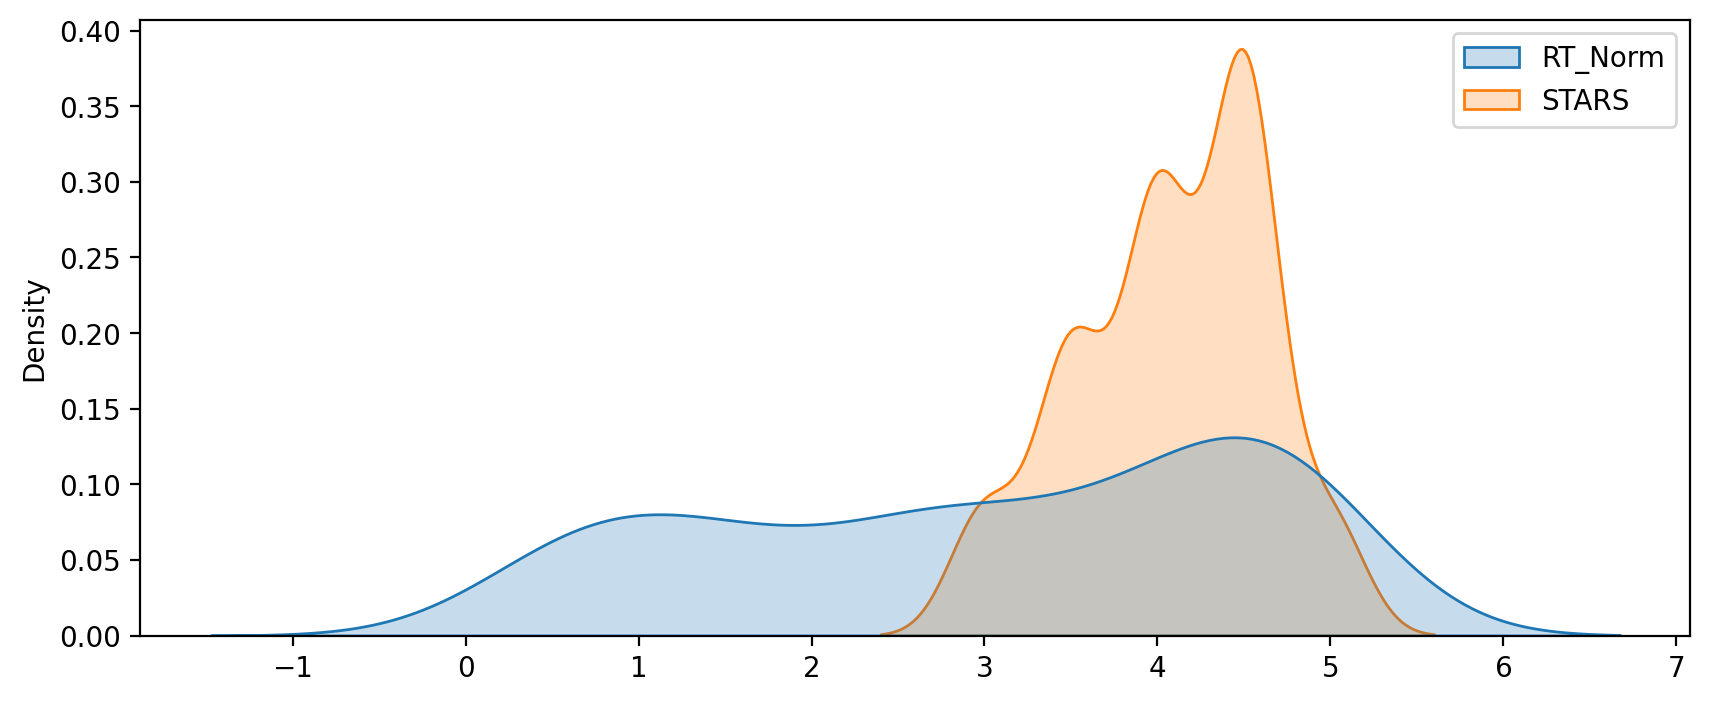

In [60]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],fill=True);

### Creating a histplot comparing all normalized scores.

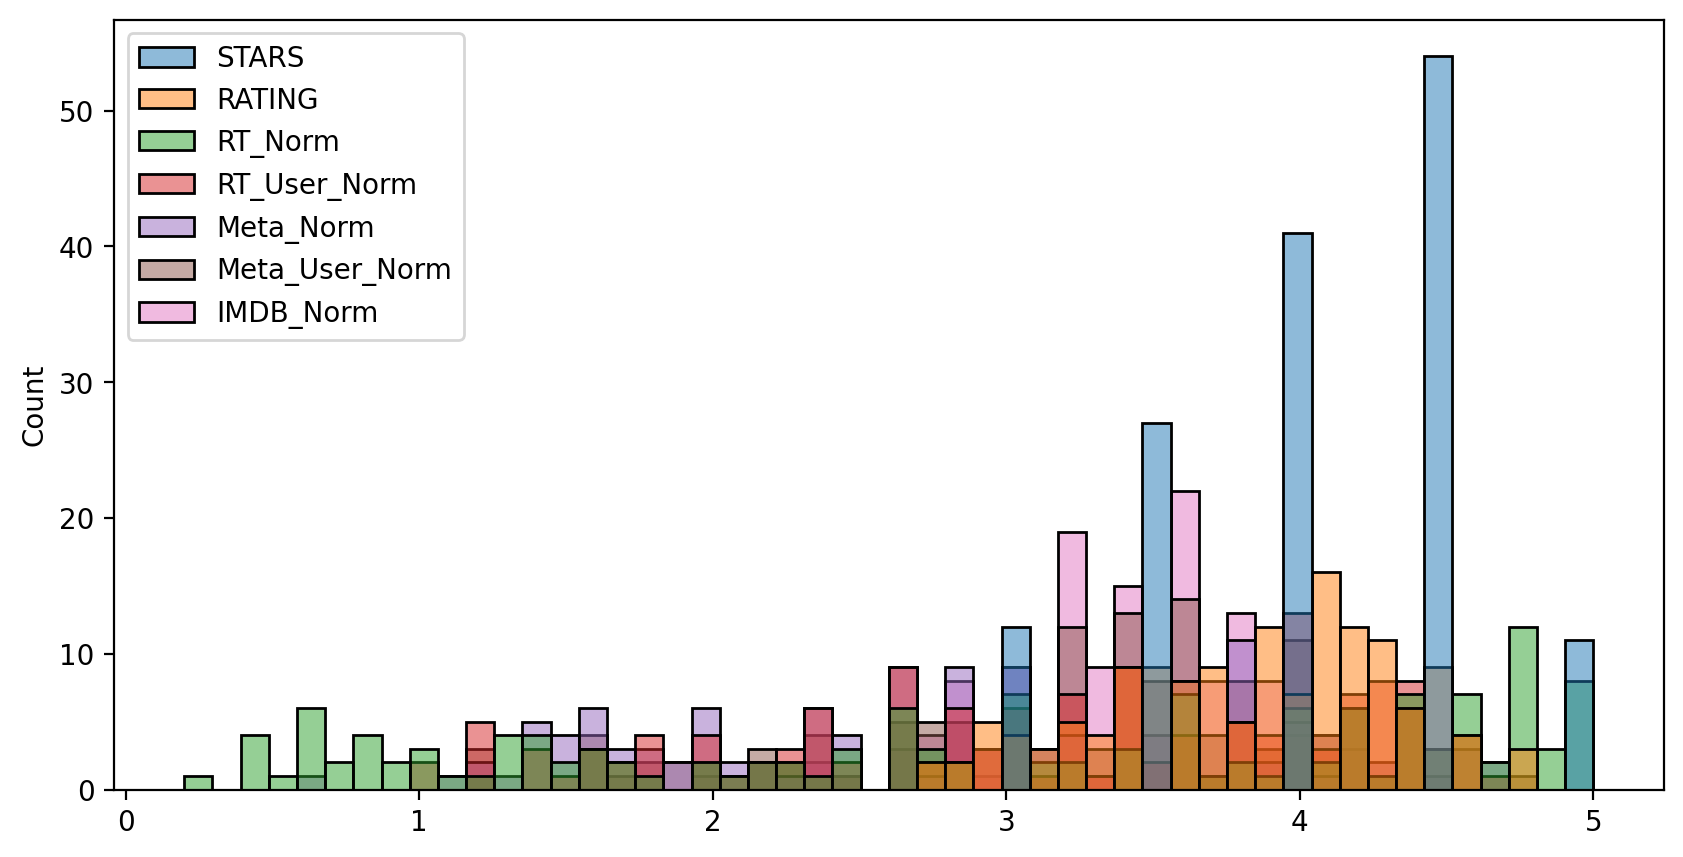

In [61]:
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=norm_scores,fill=True,bins=50);

### Let's find out the worst movies rated across all platforms.

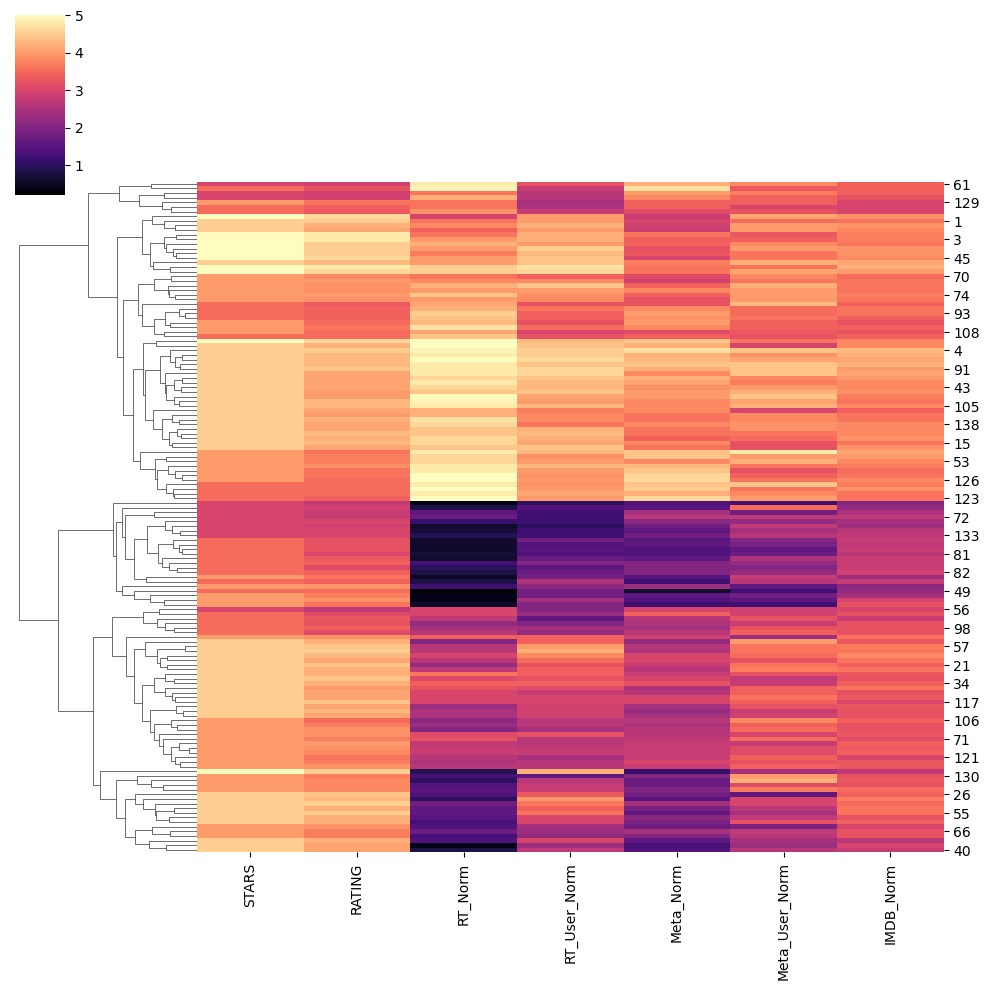

In [62]:
sns.clustermap(data=norm_scores,col_cluster=False, cmap='magma');

### Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.
### Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [63]:
worst_films = norm_scores.nsmallest(10,'RT_Norm')

In [64]:
worst_films

,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7


### Visualizing the distribution of ratings across all sites for the top 10 worst movies.

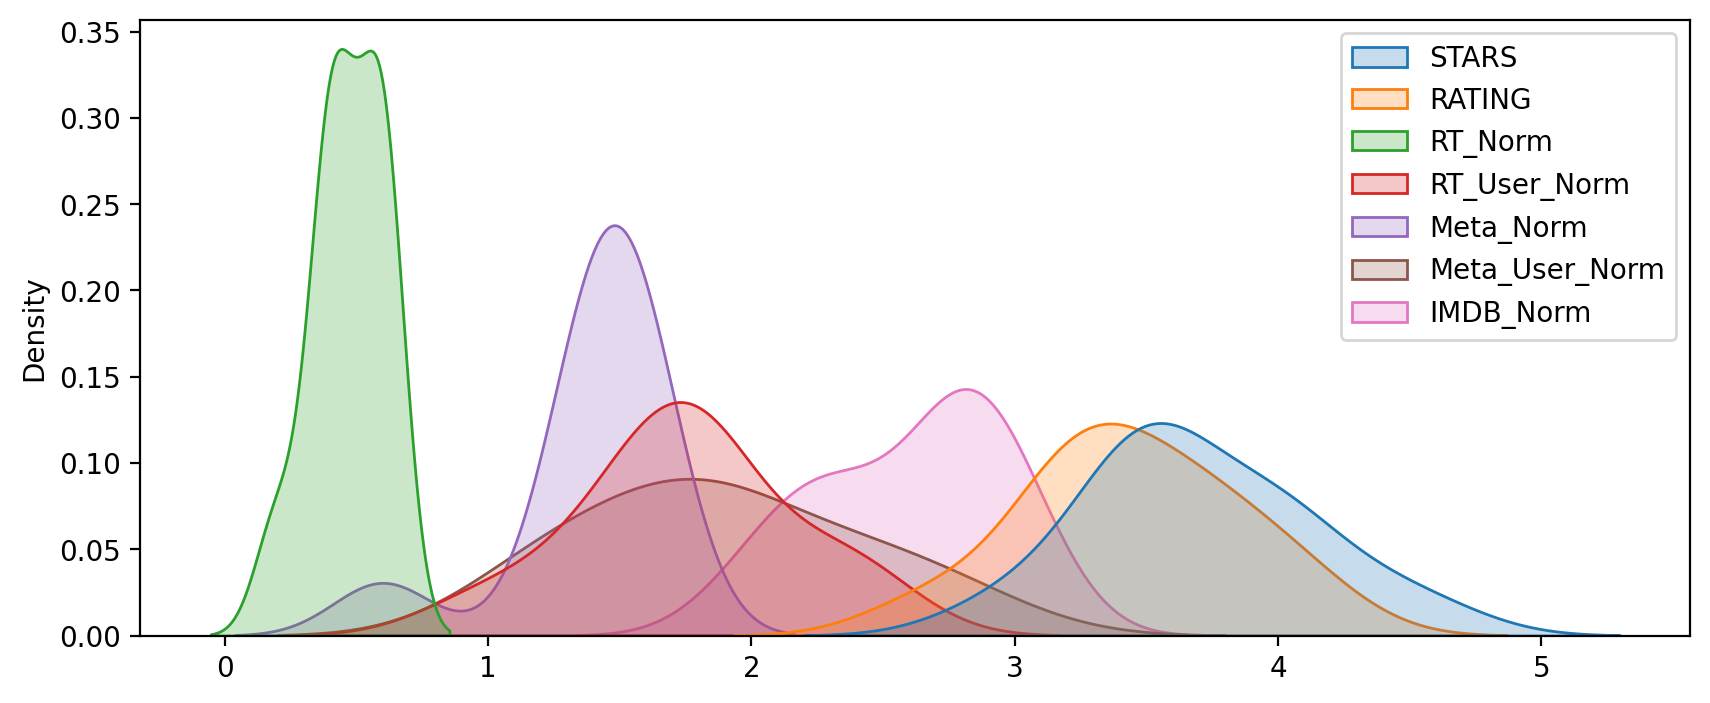

In [65]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=worst_films,fill=True);

### Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!

In [66]:
df.iloc[25]

FILM                          Taken 3 (2015)
STARS                                    4.5
RATING                                   4.1
VOTES                                   6757
YEAR                                    2015
RottenTomatoes                             9
RottenTomatoes_User                       46
Metacritic                                26
Metacritic_User                          4.6
IMDB                                     6.1
Metacritic_user_vote_count               240
IMDB_user_vote_count                  104235
Rotten_Diff                              -37
RT_Norm                                  0.4
RT_User_Norm                             2.3
Meta_Norm                                1.3
Meta_User_Norm                           2.3
IMDB_Norm                                3.0
Name: 25, dtype: object

In [67]:
0.4+2.3+1.3+2.3+3

9.3

In [68]:
9.3/5

1.86